# **Salary Predictor**





# Part 1: Data Exploration & Data Cleaning

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
file_path = 'Salary.csv'
data = pd.read_csv(file_path)

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


### Let's check for missign values

In [3]:
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(Age                    0
 Gender                 0
 Education Level        0
 Job Title              0
 Years of Experience    0
 Salary                 0
 Country                0
 Race                   0
 Senior                 0
 dtype: int64,
 Age                    float64
 Gender                  object
 Education Level          int64
 Job Title               object
 Years of Experience    float64
 Salary                 float64
 Country                 object
 Race                    object
 Senior                   int64
 dtype: object)

### Let's have a futher look at our data

In [4]:
# Statistiques de base pour les colonnes numériques
numeric_stats = data.describe()

# Valeurs uniques pour les colonnes catégorielles
unique_values = {column: data[column].unique() for column in data.select_dtypes(include=['object']).columns}

numeric_stats, unique_values

(               Age  Education Level  Years of Experience         Salary  \
 count  6684.000000      6684.000000          6684.000000    6684.000000   
 mean     33.610563         1.622382             8.077723  115307.175194   
 std       7.595994         0.880474             6.029305   52806.810881   
 min      21.000000         0.000000             0.000000     350.000000   
 25%      28.000000         1.000000             3.000000   70000.000000   
 50%      32.000000         1.000000             7.000000  115000.000000   
 75%      38.000000         2.000000            12.000000  160000.000000   
 max      62.000000         3.000000            34.000000  250000.000000   
 
             Senior  
 count  6684.000000  
 mean      0.143477  
 std       0.350585  
 min       0.000000  
 25%       0.000000  
 50%       0.000000  
 75%       0.000000  
 max       1.000000  ,
 {'Gender': array(['Male', 'Female'], dtype=object),
  'Job Title': array(['Software Engineer', 'Data Analyst', 'Ma

### Now at the categorical values

In [5]:
categorical_distribution = {column: data[column].value_counts() for column in data.select_dtypes(include=['object']).columns}

categorical_distribution

{'Gender': Male      3671
 Female    3013
 Name: Gender, dtype: int64,
 'Job Title': Software Engineer                 809
 Data Scientist                    515
 Data Analyst                      391
 Software Engineer Manager         376
 Product Manager                   323
                                  ... 
 Customer Support Specialist         1
 VP of Finance                       1
 Director of Product Management      1
 CEO                                 1
 Human Resources Director            1
 Name: Job Title, Length: 129, dtype: int64,
 'Country': USA          1356
 China        1339
 Australia    1335
 UK           1332
 Canada       1322
 Name: Country, dtype: int64,
 'Race': White               1957
 Asian               1599
 Korean               457
 Australian           452
 Chinese              443
 Black                435
 African American     352
 Mixed                334
 Welsh                333
 Hispanic             322
 Name: Race, dtype: int64}

# Part 2: Statistical Visualisation of our dataset

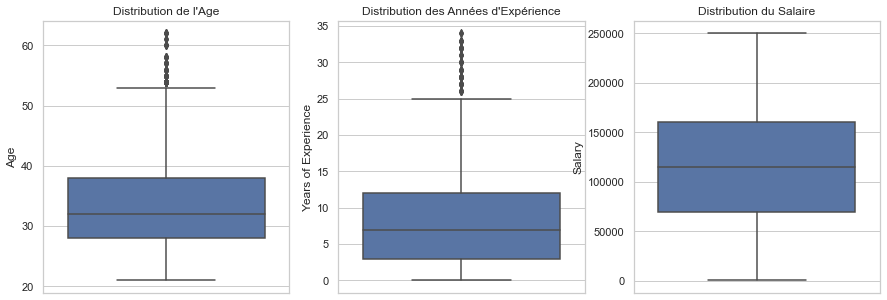

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(y=data["Age"])
plt.title("Distribution de l'Age")


plt.subplot(1, 3, 2)
sns.boxplot(y=data["Years of Experience"])
plt.title("Distribution des Années d'Expérience")


plt.subplot(1, 3, 3)
sns.boxplot(y=data["Salary"])
plt.title("Distribution du Salaire")

plt.show()


# Part 3: We now need to encode our categorical values

In [7]:
one_hot_encoded_data = pd.get_dummies(data, columns=['Job Title', 'Country', 'Race'])
one_hot_encoded_data['Gender'] = one_hot_encoded_data['Gender'].map({'Male': 1, 'Female': 0})


one_hot_encoded_data.head()

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Job Title_Account Executive,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,1,1,5.0,90000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,0,2,3.0,65000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,45.0,1,3,15.0,150000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,0,1,7.0,60000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,1,2,20.0,200000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Part 4: Let's build the models

In [8]:
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.drop('Salary', axis=1)
y = one_hot_encoded_data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5347, 149), (1337, 149), (5347,), (1337,))

In [10]:
import joblib
# After creating X_train
X_train_columns = X_train.columns.to_list()
joblib.dump(X_train_columns, 'x_train_columns.joblib')


['x_train_columns.joblib']

# 4.1 Finding the best parameters

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline #Pipeline to scale the Data
from sklearn.ensemble import RandomForestRegressor

param_grid_elasticnet = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.2, 0.5, 0.8]
}

# ElasticNet
elasticnet_model = ElasticNet(max_iter=10000)

grid_search_elasticnet = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid_elasticnet, cv=3, n_jobs=-1, verbose=2)
grid_search_elasticnet.fit(X_train, y_train)

best_params_elasticnet = grid_search_elasticnet.best_params_
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)

# KNN
param_grid_knn = {
    'knn__n_neighbors': list(range(1, 31)),
    'knn__weights': ['uniform', 'distance']
}

knn_regressor = KNeighborsRegressor()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn_regressor)
])

grid_search_knn = GridSearchCV(estimator=pipeline, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

print("Best parameters for KNN:", best_params_knn)


# Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Nombre d'arbres présent
    'max_depth': [10, 20, None],  # Profondeur maximale
    'min_samples_split': [2, 5],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2]   # Nombre minimum d'échantillons pour être à un nœud feuille
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters for Elastic Net Regression: {'alpha': 0.01, 'l1_ratio': 0.8}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters for KNN: {'knn__n_neighbors': 8, 'knn__weights': 'distance'}
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# 4.2 Predictions

In [ ]:
linear_model = LinearRegression()

# Linear Regression
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# ElasticNet
y_pred_elasticnet = grid_search_elasticnet.best_estimator_.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

# KNN
y_pred_knn = best_knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


# Random Forest
y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

performance_metrics = {
    'Model': ['Linear Regression', 'ElasticNet', 'KNN', 'Random Forest'],
    'MSE': [mse_linear, mse_elasticnet, mse_knn, mse],
    'MAE': [mae_linear, mae_elasticnet, mae_knn, mae],
    'R-squared': [r2_linear, r2_elasticnet, r2_knn, r2]
}
performance_df = pd.DataFrame(performance_metrics)
performance_df


,Model,MSE,MAE,R-squared
0,Linear Regression,3.596423e+26,1.833938e+12,-1.294184e+17
1,ElasticNet,4.951083e+08,1.657620e+04,8.218337e-01
2,KNN,4.385216e+08,1.234944e+04,8.421966e-01
3,Random Forest,7.789531e+07,3.882011e+03,9.719691e-01


# 4.3 Visualization

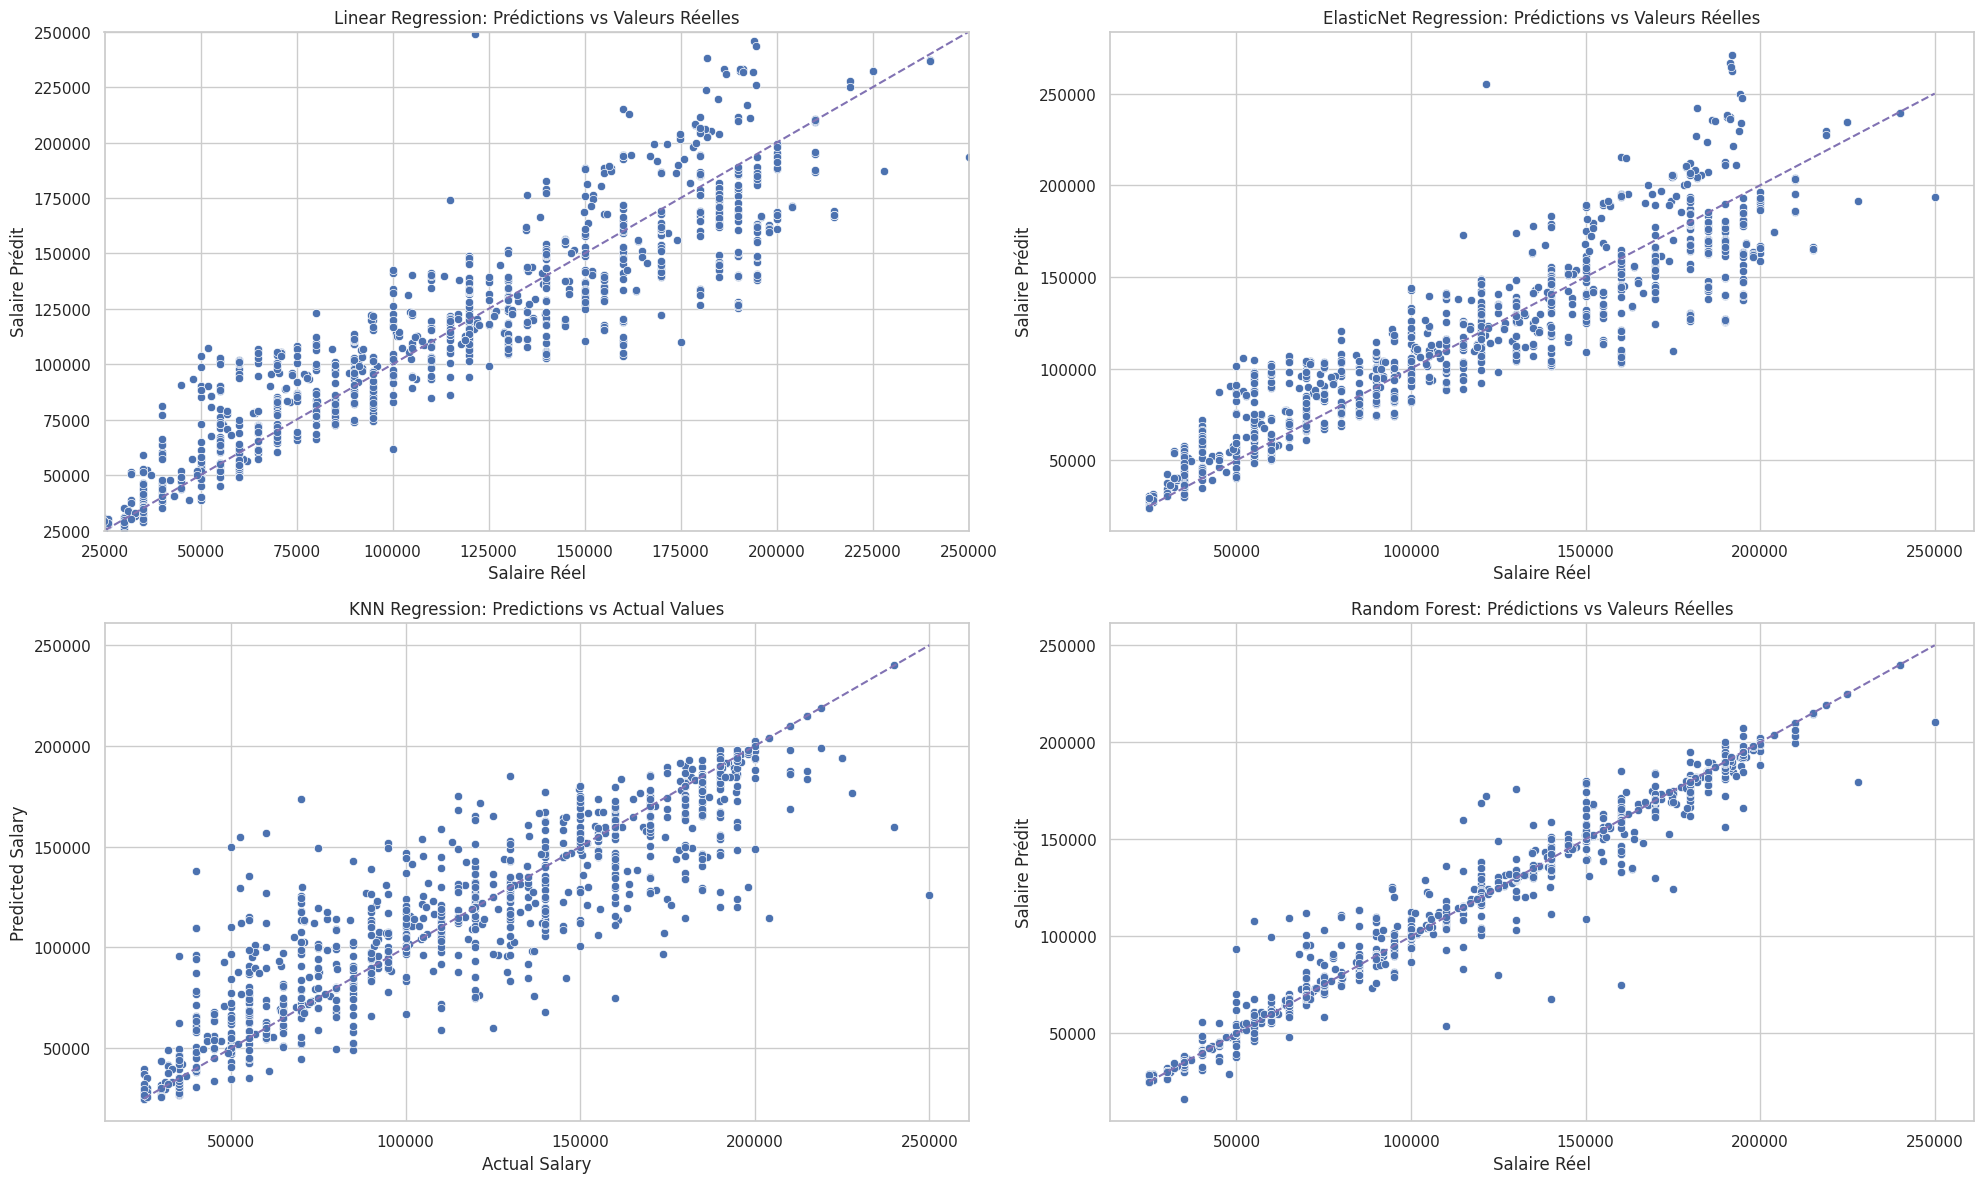

In [ ]:

plt.figure(figsize=(20, 12))

# Linear Regression
plt.subplot(2, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear}))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.title('Linear Regression: Prédictions vs Valeurs Réelles')
plt.xlabel('Salaire Réel')
plt.ylabel('Salaire Prédit')

# ElasticNet
plt.subplot(2, 2, 2)
sns.scatterplot(x='Actual', y='Predicted', data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_elasticnet}))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')
plt.title('ElasticNet Regression: Prédictions vs Valeurs Réelles')
plt.xlabel('Salaire Réel')
plt.ylabel('Salaire Prédit')

# KNN
plt.subplot(2, 2, 3)
sns.scatterplot(x='Actual', y='Predicted', data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn}))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')
plt.title('KNN Regression: Predictions vs Actual Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')

# Random Forest
plt.subplot(2, 2, 4)
sns.scatterplot(x='Actual', y='Predicted', data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--')
plt.title('Random Forest: Prédictions vs Valeurs Réelles')
plt.xlabel('Salaire Réel')
plt.ylabel('Salaire Prédit')


plt.tight_layout()
plt.show()

# Last part: Let's do some features analysis

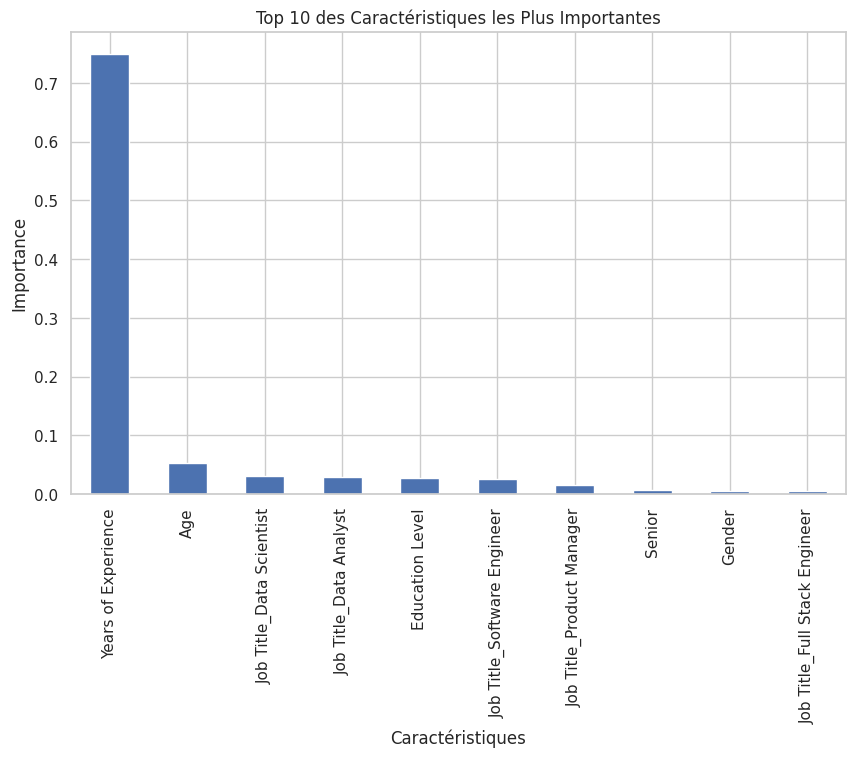

Years of Experience              0.748921
Age                              0.052556
Job Title_Data Scientist         0.031838
Job Title_Data Analyst           0.029478
Education Level                  0.027977
Job Title_Software Engineer      0.025317
Job Title_Product Manager        0.016385
Senior                           0.007916
Gender                           0.006167
Job Title_Full Stack Engineer    0.006154
dtype: float64

In [ ]:
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)

sorted_feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 des Caractéristiques les Plus Importantes')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()

sorted_feature_importances.head(10)


# Bonus Part: User Input Testing Using Random Forest

In [ ]:
def predict_salary(grid_search, X_train, data):
    # User inputs
    age = int(input("Enter your age: "))
    gender = input("Enter your gender (Male/Female): ")
    print("Available Job Titles:", ", ".join(sorted(data['Job Title'].unique())))
    job_title = input("Enter your job title: ")
    if job_title not in data['Job Title'].unique():
        print("Data for this specific job title is unavailable.")
        return
    print("Available Countries:", ", ".join(sorted(data['Country'].unique())))
    country = input("Enter your nationality: ")
    if country not in data['Country'].unique():
        print("Data for this specific country is unavailable.")
        return
    print("Available Races:", ", ".join(sorted(data['Race'].unique())))
    race = input("Enter your race: ")
    if race not in data['Race'].unique():
        print("Data for this specific race is unavailable.")
        return
    years_of_experience = int(input("Enter your years of experience: "))
    senior = int(input("Are you a senior? (1 for Yes, 0 for No): "))
    education_level = int(input("Enter your education level (as a number): "))

    # Prep Data
    user_data = {
        'Age': age,
        'Gender': 1 if gender.lower() == 'male' else 0,
        'Years of Experience': years_of_experience,
        'Senior': senior,
        'Education Level': education_level
    }
    for column in X_train.columns:
        if column.startswith('Job Title_'):
            user_data[column] = 1 if column == f'Job Title_{job_title}' else 0
        elif column.startswith('Country_'):
            user_data[column] = 1 if column == f'Country_{country}' else 0
        elif column.startswith('Race_'):
            user_data[column] = 1 if column == f'Race_{race}' else 0
        else:
            if column not in user_data:
                user_data[column] = 0
    user_input_df = pd.DataFrame([user_data], columns=X_train.columns)

    #Prediction
    predicted_salary = grid_search.best_estimator_.predict(user_input_df)
    print(f"The predicted salary is: ${predicted_salary[0]:,.2f}")

predict_salary(grid_search, X_train, data)


Enter your age: 32
Enter your gender (Male/Female): male
Available Job Titles: Account Executive, Account Manager, Accountant, Administrative Assistant, Advertising Coordinator, Back end Developer, Business Analyst, Business Development Associate, Business Development Manager, Business Intelligence Analyst, Business Operations Analyst, CEO, Chief Data Officer, Chief Technology Officer, Consultant, Content Marketing Manager, Copywriter, Creative Director, Customer Service Manager, Customer Service Rep, Customer Service Representative, Customer Success Manager, Customer Success Rep, Customer Support Specialist, Data Analyst, Data Engineer, Data Entry Clerk, Data Scientist, Delivery Driver, Designer, Developer, Digital Content Producer, Digital Marketing Manager, Digital Marketing Specialist, Director, Director of Business Development, Director of Data Science, Director of Engineering, Director of Finance, Director of HR, Director of Human Capital, Director of Human Resources, Director of